In [1]:
import pandas as pd
import numpy as np
import tensorflow as tf
import warnings
warnings.simplefilter("ignore")
from sklearn.utils import resample

url_1 = 'https://raw.githubusercontent.com/takanju/wids_datathon_2021/master/TrainingWiDS2021.csv'
train_local_path = './data/TrainingWiDS2021.csv'
url_2 = 'https://raw.githubusercontent.com/takanju/wids_datathon_2021/master/UnlabeledWiDS2021.csv'
test_local_path = './data/UnlabeledWiDS2021.csv'

In [2]:
# Splitted data to make same shape of both test and train so that we can apply pre processing on both
# Ref : https://www.kaggle.com/siavrez/2020fatures
medical_data = pd.read_csv(train_local_path, error_bad_lines=False, index_col=0)
test_df = pd.read_csv(test_local_path, error_bad_lines=False, index_col=0)
y = medical_data["diabetes_mellitus"]
medical_data = medical_data.drop(["diabetes_mellitus"], axis=1)


In [3]:
medical_data.shape

(130157, 179)

In [4]:
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(medical_data.head(2))
    display(medical_data.describe())
    display(test_df.head(2))
    display(test_df.describe())

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
1,214826,118,68.0,22.732803,0,Caucasian,M,180.3,Floor,Floor,92,admit,CTICU,0.541667,0,73.9,2.3,113.0,502.01,0,0,0.4,31.0,2.51,NaN,3.0,6.0,0.0,4.0,168.0,118.0,27.4,0,40.0,NaN,NaN,NaN,NaN,36.0,134.0,39.3,NaN,0,14.1,46.0,32.0,68.0,37.0,68.0,37.0,119.0,72.0,66.0,40.0,89.0,46.0,89.0,46.0,34.0,10.0,100.0,74.0,122.0,64.0,131.0,73.0,131.0,73.0,39.9,37.2,NaN,NaN,68.0,63.0,68.0,63.0,119.0,108.0,NaN,NaN,86.0,85.0,86.0,85.0,26.0,18.0,100.0,74.0,NaN,NaN,131.0,115.0,131.0,115.0,39.5,37.5,2.3,2.3,0.4,0.4,31.0,30.0,8.5,7.4,2.51,2.23,168.0,109.0,19.0,15.0,8.9,8.9,27.4,27.4,NaN,NaN,1.3,1.0,233.0,233.0,4.0,3.4,136.0,134.0,14.1,14.1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
2,246060,81,77.0,27.421875,0,Caucasian,F,160.0,Floor,Floor,90,admit,Med-Surg ICU,0.927778,0,70.2,NaN,108.0,203.01,0,0,NaN,9.0,0.56,1.0,1.0,3.0,0.0,1.0,145.0,120.0,36.9,0,46.0,37.0,37.0,51.0,7.45,33.0,145.0,35.1,NaN,1,12.7,NaN,NaN,95.0,31.0,95.0,31.0,118.0,72.0,NaN,NaN,120.0,38.0,120.0,38.0,32.0,12.0,100.

,encounter_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,130157.000000,130157.000000,125169.000000,125667.000000,130157.000000,128080.000000,130157.000000,130157.000000,130157.0,126694.000000,51994.000000,128472.000000,129292.000000,130157.000000,130157.000000,47597.000000,104746.000000,105275.000000,30437.000000,127967.000000,127967.000000,129448.000000,127967.000000,115461.000000,129848.000000,103399.000000,130157.000000,129737.000000,30437.000000,30437.000000,30437.000000,30437.000000,129349.000000,105638.00000,123546.000000,66990.000000,130157.000000,100682.000000,35089.000000,35089.000000,129880.000000,129880.000000,128521.000000,128521.000000,129895.000000,129895.000000,35289.000000,35289.000000,129830.000000,129830.000000,127929.000000,127929.000000,129474.000000,129474.000000,129625.000000,129625.000000,35119.000000,35119.000000,129886.000000,129886.000000,128534.000000,128534.000000,125663.000000,125663.000000,25328.000000,25328.000000,124630.000000,124630.000000,118818.000000,118818.000000,126083.000000,126083.000000,25391.000000,25391.000000,123627.000000,123627.000000,116860.000000,116860.000000,123703.000000,123703.000000,123915.000000,123915.000000,25350.000000,25350.00000,124638.000000,124638.000000,118827.000000,118827

,encounter_id,hospital_id,age,bmi,elective_surgery,ethnicity,gender,height,hospital_admit_source,icu_admit_source,icu_id,icu_stay_type,icu_type,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
1,144740,10141,72,NaN,0,Caucasian,F,152.4,Floor,Accident & Emergency,82,admit,Med-Surg ICU,0.015278,0,NaN,2.8,110.0,104.01,0,0,1.9,44.0,1.49,NaN,4.0,6.0,0.0,5.0,97.0,38.0,39.9,0,54.0,NaN,NaN,NaN,NaN,31.0,130.0,36.4,NaN,0,5.4,NaN,NaN,104.0,40.0,104.0,40.0,66.0,38.0,NaN,NaN,123.0,54.0,123.0,54.0,35.0,15.0,100.0,96.0,NaN,NaN,149.0,76.0,149.0,76.0,38.7,35.6,NaN,NaN,59.0,59.0,59.0,59.0,46.0,44.0,NaN,NaN,80.0,80.0,80.0,80.0,19.0,19.0,97.0,96.0,NaN,NaN,116.0,116.0,116.0,116.0,36.4,36.4,2.8,2.8,1.9,1.9,44.0,40.0,9.8,9.3,1.49,1.44,104.0,97.0,26.0,23.0,14.5,14.2,42.8,39.9,NaN,NaN,NaN,NaN,173.0,173.0,5.7,4.9,132.0,130.0,5.6,5.4,2.8,2.8,1.9,1.9,40.0,40.0,9.8,9.8,1.49,1.49,104.0,104.0,26.0,26.0,14.5,14.5,42.8,42.8,NaN,NaN,NaN,NaN,173.0,173.0,4.9,4.9,132.0,132.0,5.6,5.6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0
2,141990,10141,86,NaN,0,Caucasian,F,175.3,Emergency Department,Accident & Emergency,82,admit,Med-Surg ICU,0.000000,0,NaN,NaN,117.0,106.01,0,0,NaN,19.0,0.92,NaN,4.0,6.0,0.0,5.0,73.0,116.0,NaN,0,41.0,NaN,NaN,NaN,NaN,53.0,142.0,36.3,NaN,0,NaN,NaN,NaN,101.0,27.0,101.0,27.0,116.0,56.

,encounter_id,hospital_id,age,bmi,elective_surgery,height,icu_id,pre_icu_los_days,readmission_status,weight,albumin_apache,apache_2_diagnosis,apache_3j_diagnosis,apache_post_operative,arf_apache,bilirubin_apache,bun_apache,creatinine_apache,fio2_apache,gcs_eyes_apache,gcs_motor_apache,gcs_unable_apache,gcs_verbal_apache,glucose_apache,heart_rate_apache,hematocrit_apache,intubated_apache,map_apache,paco2_apache,paco2_for_ph_apache,pao2_apache,ph_apache,resprate_apache,sodium_apache,temp_apache,urineoutput_apache,ventilated_apache,wbc_apache,d1_diasbp_invasive_max,d1_diasbp_invasive_min,d1_diasbp_max,d1_diasbp_min,d1_diasbp_noninvasive_max,d1_diasbp_noninvasive_min,d1_heartrate_max,d1_heartrate_min,d1_mbp_invasive_max,d1_mbp_invasive_min,d1_mbp_max,d1_mbp_min,d1_mbp_noninvasive_max,d1_mbp_noninvasive_min,d1_resprate_max,d1_resprate_min,d1_spo2_max,d1_spo2_min,d1_sysbp_invasive_max,d1_sysbp_invasive_min,d1_sysbp_max,d1_sysbp_min,d1_sysbp_noninvasive_max,d1_sysbp_noninvasive_min,d1_temp_max,d1_temp_min,h1_diasbp_invasive_max,h1_diasbp_invasive_min,h1_diasbp_max,h1_diasbp_min,h1_diasbp_noninvasive_max,h1_diasbp_noninvasive_min,h1_heartrate_max,h1_heartrate_min,h1_mbp_invasive_max,h1_mbp_invasive_min,h1_mbp_max,h1_mbp_min,h1_mbp_noninvasive_max,h1_mbp_noninvasive_min,h1_resprate_max,h1_resprate_min,h1_spo2_max,h1_spo2_min,h1_sysbp_invasive_max,h1_sysbp_invasive_min,h1_sysbp_max,h1_sysbp_min,h1_sysbp_noninvasive_max,h1_sysbp_noninvasive_min,h1_temp_max,h1_temp_min,d1_albumin_max,d1_albumin_min,d1_bilirubin_max,d1_bilirubin_min,d1_bun_max,d1_bun_min,d1_calcium_max,d1_calcium_min,d1_creatinine_max,d1_creatinine_min,d1_glucose_max,d1_glucose_min,d1_hco3_max,d1_hco3_min,d1_hemaglobin_max,d1_hemaglobin_min,d1_hematocrit_max,d1_hematocrit_min,d1_inr_max,d1_inr_min,d1_lactate_max,d1_lactate_min,d1_platelets_max,d1_platelets_min,d1_potassium_max,d1_potassium_min,d1_sodium_max,d1_sodium_min,d1_wbc_max,d1_wbc_min,h1_albumin_max,h1_albumin_min,h1_bilirubin_max,h1_bilirubin_min,h1_bun_max,h1_bun_min,h1_calcium_max,h1_calcium_min,h1_creatinine_max,h1_creatinine_min,h1_glucose_max,h1_glucose_min,h1_hco3_max,h1_hco3_min,h1_hemaglobin_max,h1_hemaglobin_min,h1_hematocrit_max,h1_hematocrit_min,h1_inr_max,h1_inr_min,h1_lactate_max,h1_lactate_min,h1_platelets_max,h1_platelets_min,h1_potassium_max,h1_potassium_min,h1_sodium_max,h1_sodium_min,h1_wbc_max,h1_wbc_min,d1_arterial_pco2_max,d1_arterial_pco2_min,d1_arterial_ph_max,d1_arterial_ph_min,d1_arterial_po2_max,d1_arterial_po2_min,d1_pao2fio2ratio_max,d1_pao2fio2ratio_min,h1_arterial_pco2_max,h1_arterial_pco2_min,h1_arterial_ph_max,h1_arterial_ph_min,h1_arterial_po2_max,h1_arterial_po2_min,h1_pao2fio2ratio_max,h1_pao2fio2ratio_min,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
count,10234.000000,10234.000000,10234.000000,9219.000000,10234.000000,9933.000000,10234.000000,10234.000000,10234.0,9326.000000,4179.000000,10064.000000,10126.000000,10234.000000,10234.000000,3924.000000,8173.000000,8191.000000,2599.000000,10029.000000,10029.000000,10173.000000,10029.000000,9024.000000,10204.000000,8120.000000,10234.000000,10182.000000,2599.000000,2599.000000,2599.000000,2599.000000,10170.000000,8241.000000,9563.000000,5044.000000,10234.000000,7858.000000,2909.000000,2909.000000,10211.000000,10211.000000,10085.000000,10085.000000,10210.000000,10210.000000,2919.000000,2919.000000,10197.000000,10197.000000,10022.000000,10022.000000,10179.000000,10179.000000,10172.000000,10172.000000,2912.000000,2912.000000,10211.000000,10211.000000,10086.000000,10086.000000,9804.000000,9804.000000,2061.000000,2061.000000,9582.000000,9582.000000,9078.000000,9078.000000,9683.000000,9683.000000,2048.000000,2048.000000,9437.000000,9437.000000,8845.000000,8845.000000,9510.000000,9510.000000,9508.000000,9508.000000,2064.000000,2064.000000,9583.000000,9583.000000,9079.000000,9079.000000,7580.000000,7580.000000,4694.000000,4694.000000,4374.000000,4374.000000,9126.000000,9126.000000,8832.000000,

In [5]:
# Percentage of missing values 

pd.DataFrame(medical_data.isna().sum()*100/len(medical_data))

,0
encounter_id,0.000000
hospital_id,0.000000
age,3.832295
bmi,3.449680
elective_surgery,0.000000
ethnicity,1.219297
gender,0.050708
height,1.595765
hospital_admit_source,25.506120
icu_admit_source,0.184393


# Pre processing by Aishwarya

In [6]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler

def preProcessing1(df: pd.DataFrame, y:pd.Series) -> pd.DataFrame:
  columns=df.columns

  #dropping column which are either irrelevant or around 50% of missing values
  df=df.drop(['encounter_id', 'hospital_id', 'icu_id', 'albumin_apache','bilirubin_apache','fio2_apache','paco2_apache','paco2_for_ph_apache','pao2_apache','ph_apache', 'urineoutput_apache'], axis=1)

  #separating categorical & numerical features
  df_cat = df.select_dtypes("object")
  df_num = df.select_dtypes("number")
  cat_cal = df_cat.columns
  print(cat_cal)
  num_cal = df_num.columns
  
  #imputing categorical features by mode
  impute_size1=SimpleImputer(strategy="most_frequent") 
  df_cat = impute_size1.fit_transform(df_cat)
  df_cat = pd.DataFrame(df_cat, columns = cat_cal)

  #imputing numerical features by mean
  impute_size2=SimpleImputer(missing_values=np.nan, strategy="mean") 
  df_num = impute_size2.fit_transform(df_num)

  df_num = pd.DataFrame(df_num, columns = num_cal)
  #concatenating both categorical & numerical features
#   df = df_cat.join(df_num)
#   return df, [impute_size1, impute_size2 ]
  
  #Standardization
  scaler = StandardScaler()
  scaled_df = scaler.fit_transform(df_num)
  df_num_scale = pd.DataFrame(data=scaled_df, columns=df_num.columns)

  #One Hot Encoding
  onehotencoder = OneHotEncoder(handle_unknown='ignore')
  df_cat_encod = onehotencoder.fit_transform(df_cat)
  df = df_cat.join(df_num_scale)

  return df, [impute_size1, impute_size2, scaler, {"OHE":(cat_cal, df_cat_encod, onehotencoder)}]



# Pre processing by Anjali

In [7]:
#!pip install tqdm
from sklearn.linear_model import LinearRegression, LassoCV
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from tqdm import tqdm
from scipy import stats, special
import pandas as pd
import numpy as np
import os
import warnings
warnings.simplefilter("ignore")

# Ref: https://www.kaggle.com/shashankasubrahmanya/missing-data-imputation-using-regression

# filling missing values based on linear regression and the most correlated variables
# linear regression -> F-test (which columns are mostly related with the given target column, other than "diabetes")
# Multi-colinearity
# target = diabetes
# Remove features which has more than 50% percentage of missing values
# Return reduced dataset

# Linear Regression
def fillna_using_linear_model(df: pd.DataFrame):
    fea_cols=[]
    for col in df.columns:
        if df[col].dtype=='float64':
            fea_cols.append(col)

    correl = df[fea_cols].corr()

    for col in tqdm(fea_cols):
        nan_ratio = df[col].isnull().sum() / df.shape[0]
        if nan_ratio > 0:
            best_nan_ratio = nan_ratio
            best_col = None
            for id in correl.loc[(correl[col] > 0.7) | (correl[col] < -0.7), col].index:
                nan_temp_ratio = df[id].isnull().sum() / df.shape[0]
                if best_nan_ratio > nan_temp_ratio:
                    best_nan_ratio = nan_temp_ratio
                    best_col = id
            if best_col != None:
                sub = df[[col, best_col]].copy()
                sub = sub.dropna()
                reg = LinearRegression(fit_intercept=True).fit(np.expand_dims(sub[best_col], axis=1), sub[col])
                print(reg.score(np.expand_dims(sub[best_col], axis=1), sub[col]))
                if reg.score(np.expand_dims(sub[best_col], axis=1), sub[col])>0.7:
                    if df.loc[(~df[best_col].isnull()) & (df[col].isnull()), col].shape[0] > 0:
                        df.loc[(~df[best_col].isnull()) & (df[col].isnull()), col] = \
                        reg.predict(np.expand_dims(df.loc[(~df[best_col].isnull()) & (df[col].isnull()), best_col], axis=1))

    return df


def preProcessing2(df: pd.DataFrame, y:pd.Series) -> pd.DataFrame:
  columns=df.columns

# Replace values such as +,- ininity with nan
  df = df.replace([np.inf, -np.inf], np.nan)

# Linear regression
  linReg = fillna_using_linear_model(df)

# Simple Imputing
  imputer = SimpleImputer(strategy="mean")
  imputed_df = pd.DataFrame(imputer.fit_transform(linReg.values))

# Standardization
  scaler = StandardScaler()
  scaled_df = scaler.fit_transform(imputed_df)
  df= pd.DataFrame(data=scaled_df, columns=columns)
  
  return df, [imputer, scaler]

# dd = preProcessing2(medical_data.copy(), y)
# dd


# Pre processing by Jae Woong

In [8]:
from sklearn.impute import SimpleImputer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer # MICE 
from sklearn.preprocessing import StandardScaler
# from discretization import MDLP
# from mdlp.discretization import MDLP

def preProcessing3(df: pd.DataFrame, y: pd.Series) -> pd.DataFrame:
  columns = df.columns

  # Log transform for skewing data
  # https://stats.stackexchange.com/questions/267078/why-is-skewed-data-not-preferred-for-modelling
  # https://stats.stackexchange.com/questions/299154/the-benefit-of-unskewing-skewed-data
  logs_transform_list = ['d1_bilirubin_min', 'd1_bilirubin_max', 'd1_glucose_max', 'h1_bilirubin_max', 'h1_bilirubin_min', 'h1_bun_max', 'h1_bun_min']
  df[logs_transform_list] = np.log2(df[logs_transform_list])

  # Simple Imputing
  imputer = SimpleImputer(strategy="mean")
  imputed_df = imputer.fit_transform(df.values)

  # Standardization
  scaler = StandardScaler()
  imputed_scaled_df = scaler.fit_transform(imputed_df)

  df = pd.DataFrame(columns=columns, data=imputed_scaled_df)

  return df, [{"columns": logs_transform_list, "transform": np.log2}, imputer, scaler]

# Pre processing by Uma

In [9]:
#ref: https://www.kaggle.com/lhagiimn/7th-place-solution-wids-2021
#ref:https://www.kaggle.com/letianyu/wids-2021-notebook

def remove_NaN_Values(df, threshold):
    # store the name of columns
    # drop the same for the test set (later)
    NaN_cols = []
    for col in df.columns:
        NaN_ratio = df[col].isnull().sum() / df.shape[0]
        if NaN_ratio >= threshold:
            NaN_cols.append(col)
    df = df.drop(NaN_cols, axis=1)
    return df,NaN_cols

def preProcessing4(df: pd.DataFrame, y: pd.Series) -> pd.DataFrame:
    columns = df.columns

    Removed_NaN_df,NaN_cols = remove_NaN_Values(df,0.5)

    return Removed_NaN_df, NaN_cols


# Combine all pre processings 

In [10]:
df1 = medical_data.iloc[:, :45]
prep_df1, tf1 = preProcessing1(df1, y)
prep_df1.index = medical_data.index

df2 = medical_data.iloc[:, 45:90]
prep_df2, tf2 = preProcessing2(df2, y)
prep_df2.index = medical_data.index

df3 = medical_data.iloc[:, 90:135]
prep_df3, tf3 = preProcessing3(df3, y)
prep_df3.index = medical_data.index

df4 = medical_data.iloc[:, 135:]
prep_df4, tf4 = preProcessing4(df4, y)
prep_df4.index = prep_df1.index

prep_df = pd.concat([prep_df1, prep_df2, prep_df3, prep_df4], axis=1)

print(f'Percent of Nans: {round(prep_df.copy().isna().sum().sum()/len(prep_df.copy()), 2)}')

Index(['ethnicity', 'gender', 'hospital_admit_source', 'icu_admit_source',
       'icu_stay_type', 'icu_type'],
      dtype='object')


 71%|███████   | 32/45 [00:00<00:00, 157.89it/s]

0.563520769020351
0.9933743343176455
0.9932092949406127
0.5556868832041206
0.6232299891476356
0.5630410484129751
0.6303842387953887
0.5152979908671131
0.9928207761805053
0.9913514557124004
0.5060654310356865
0.9694702204192752
0.9658512634599362
0.6155171814780587


100%|██████████| 45/45 [00:00<00:00, 153.02it/s]


0.49954907647888736
0.716253639395113
0.7618525388005946
0.972967652946108
0.9928344337233268
0.6277670731828182
Percent of Nans: 0.0


In [11]:
prep_df.head()

,ethnicity,gender,hospital_admit_source,icu_admit_source,icu_stay_type,icu_type,age,bmi,elective_surgery,height,...,h1_calcium_max,h1_calcium_min,h1_creatinine_max,aids,cirrhosis,hepatic_failure,immunosuppression,leukemia,lymphoma,solid_tumor_with_metastasis
1,Caucasian,M,Floor,Floor,admit,CTICU,0.363992,-0.785500,-0.484070,0.995023,...,4.610996e-15,9.092629e-15,-6.395302e-16,0,0,0,0,0,0,0
2,Caucasian,F,Floor,Floor,admit,Med-Surg ICU,0.909536,-0.207955,-0.484070,-0.894006,...,8.457641e-01,8.572557e-01,-1.391968e+00,0,0,0,0,0,0,0
3,Caucasian,F,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,-2.242493,0.350105,-0.484070,0.287801,...,4.610996e-15,9.092629e-15,-6.395302e-16,0,0,0,0,0,0,0
4,Caucasian,F,Operating Room,Operating Room / Recovery,admit,CTICU,1.152000,-0.797479,2.065816,-0.419422,...,4.610996e-15,9.092629e-15,-6.395302e-16,0,0,0,0,0,0,0
5,Caucasian,M,Emergency Department,Accident & Emergency,admit,Med-Surg ICU,-2.606188,0.000000,-0.484070,1.711552,...,4.610996e-15,9.092629e-15,-6.395302e-16,0,0,0,0,0,0,0


## Preprocessed

In [27]:
# #Plot diabetes_mellitus counts to verify the distribution of data
# target = 'diabetes_mellitus'
# medical_data[target].value_counts().plot(kind="pie", explode=[0,0.1], autopct="%.2f", labels=["No","Yes"])
# plt.show()

# #The dataset is skewed towards class 0, so,balace the dataset.
# df_majority = medical_data[medical_data['diabetes_mellitus']==0]
# df_minority = medical_data[medical_data['diabetes_mellitus']==1]

# # Upsampling
# df_minority_upsampled = resample(df_minority,
#                                  replace=True,       # sample with replacement
#                                  n_samples=83798,    # to match majority class
#                                  random_state= 303)  # reproducible results
 
# # Combine majority class with upsampled minority class
# df_upsampled = pd.concat([df_majority, df_minority_upsampled])
 
# # Display new class counts
# df_upsampled.diabetes_mellitus.value_counts()

In [13]:
# #Preprocessing Test dataset

# test_df1 = test_df.iloc[:, :45]
# prep_tf1,tff = preProcessing1(test_df1, y)
# prep_tf1.index = test_df.index

# test_df2 = test_df.iloc[:, 45:90]
# prep_tf2,tff = preProcessing2(test_df2, y)
# prep_tf2.index = test_df.index

# test_df3 = test_df.iloc[:, 90:135]
# prep_tf3,tff = preProcessing3(test_df3, y)
# prep_tf3.index = test_df.index

# test_df4 = test_df.iloc[:,135:]
# prep_tf4,tff = preProcessing4(test_df4, y)
# prep_tf4.index = test_df.index

# test_df1 = test.iloc[:, :45]
# def test_prep1(df: pd.DataFrame, tf: list) -> pd.DataFrame:
#   for each in tf:
#     df = each.transform(df)

#   return df

# prep_tf = pd.concat([prep_tf1, prep_tf2, prep_tf3, prep_tf4], axis=1)
# prep_tf

In [14]:
# [Jaewoong]
# extract numberical columns
# discretize
# feature selection
# -> optimal subset of features


# [Uma]-Done
# Oversampling or Undersampling (=Resampling)
# negative class = 75%
# positive class = 25%

In [15]:
# pd to np processing
from scipy.sparse import csr_matrix, hstack
cat_col = list(tf1[-1]["OHE"][0])
num_df = csr_matrix(prep_df.drop(cat_col, axis=1).values)
cat_df = tf1[-1]["OHE"][1]

In [16]:
num_df.shape

(130157, 125)

In [17]:
cat_df.shape

(130157, 39)

In [18]:
X = hstack([num_df, cat_df])
y = y.values

In [19]:
from sklearn.model_selection import GridSearchCV, train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, train_size=0.75, random_state=42)

In [31]:
# Grid Search
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
# https://scikit-learn.org/stable/modules/model_evaluation.html#multimetric-scoring
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_multi_metric_evaluation.html#sphx-glr-auto-examples-model-selection-plot-multi-metric-evaluation-py

# Ensemble Methods
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier

# GridSearch + CV on non-sklearn models
# https://www.kaggle.com/tilii7/hyperparameter-grid-search-with-xgboost

from sklearn.linear_model import LogisticRegression, Ridge
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, StackingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, accuracy_score, f1_score, recall_score, precision_score
from sklearn import metrics, model_selection

scoring = {'AUC': 'roc_auc', 'Accuracy': make_scorer(accuracy_score), 'F1-score': make_scorer(f1_score), 'Recall': make_scorer(recall_score), 'Precision': make_scorer(precision_score)}

def grid(estimator, scoring, cv, X, y, verbose):
    return GridSearchCV(
    estimator = estimator,
    param_grid = params,
    scoring = scoring,
    cv = cv,
    verbose = verbose,
    return_train_score = True,
    refit="AUC",
    n_jobs = -3
    ).fit(X, y)

params = {
    "n_estimators": [100, 300, 500],
    "max_depth": [3, 5, 7],
    "min_samples_leaf": [1, 2, 4],
    "min_samples_split": [2, 4, 6]
  }

# params = {
#     "n_estimators": [100],
#     "max_depth": [3],
#     "min_samples_leaf": [1],
#     "min_samples_split": [2]
#   }

estimator = RandomForestClassifier()

In [32]:
grid_search = grid(estimator, scoring, 3, X_train, y_train, 4)

Fitting 3 folds for each of 81 candidates, totalling 243 fits


In [33]:
grid_search.best_estimator_

RandomForestClassifier(max_depth=7, min_samples_leaf=4, min_samples_split=4,
                       n_estimators=500)

In [34]:
grid_search.best_score_

0.8197103893173007

In [35]:
grid_search.best_params_

{'max_depth': 7,
 'min_samples_leaf': 4,
 'min_samples_split': 4,
 'n_estimators': 500}

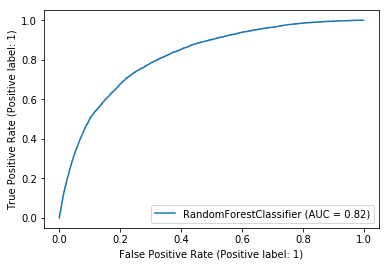

In [36]:
# clf = the best model
metrics.plot_roc_curve(grid_search.best_estimator_, X_test, y_test)

In [37]:
grid_search.cv_results_

{'mean_fit_time': array([  8.94719934,  23.9880627 ,  39.44157926,   8.9119091 ,
         26.6903433 ,  39.37241904,   8.05274614,  23.94806298,
         41.06568694,   8.08010912,  26.15600594,  39.64591471,
          8.03449909,  26.25724626,  40.01251483,   8.17051538,
         25.45171364,  39.4775486 ,   8.14777446,  25.56458584,
         40.2484177 ,   8.03837935,  24.0242037 ,  38.67334342,
          8.72095275,  23.99671078,  41.48680751,  17.46957819,
         54.93344537,  86.69691571,  17.13530628,  50.76945329,
         86.5047462 ,  16.8430268 ,  54.75923355,  85.19978412,
         13.88900558,  50.78854227,  84.60706568,  18.35374324,
         50.60237479,  86.92958085,  16.87847559,  50.69751461,
         88.51630584,  17.01254574,  50.90527765,  86.42237663,
         18.39136823,  50.33400249,  92.08772365,  18.26794155,
         48.86177794,  83.26791088,  35.5998764 , 103.34038266,
        169.14989535,  32.80514057,  97.7005895 , 165.41096385,
         34.80977376,  

In [ ]:
# acc = accuracy_score(prep_test, y_pred)
# f1 = f1_score(prep_test, y_pred)
# rec = recall_score(prep_test, y_pred)
# prec = precision_score(prep_test, y_pred)

In [ ]:
# TODO 
# Stacking https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.StackingClassifier.html#sklearn.ensemble.StackingClassifier

In [ ]:
# [Aishwarya, Anjali]
# Training our models
# (algorithms(+hparams), CV, gridsearch)

# LGBM classifier with score
X_train, X_val, y_train, y_val = train_test_split(train, y, test_size=0.20, random_state= 20, shuffle=True )
classifier = LGBMClassifier(n_estimators= 690, max_depth= 4)
classifier.fit(X_train, y_train)
classifier.score(X_val, y_val)


# XGBoost with score
import xgboost as xgb
from xgboost import XGBClassifier
data_dmatrix = xgb.DMatrix(data=X,label=y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)
model = XGBClassifier()
model.fit(X_train, y_train)
xbg_pred = model.predict(X_test)
model.score(X_train,y_train)
model.score(X_test,y_test)



# A parameter grid for XGBoost
X_train, X_val, y_train, y_val = train_test_split(X_new, y, test_size=0.2, random_state=123)
# parameters
param = { 'max_depth': 5,'subsample': 0.8,'colsample_bytree': 0.7,'colsample_bylevel': 0.7,'scale_pos_weight': 1,'min_child_weight': 1,
         'reg_alpha': 4,'n_jobs': 4, 'objective': 'binary:logistic','nthread': 4,'gamma': 0.01,'seed': 27,}
num_round =100   # the number of training iterations
xgb_cls = xgb.XGBClassifier(max_depth = 4,subsample = 0.7, colsample_bytree = 0.9, colsample_bylevel = 0.9, scale_pos_weight = 1,min_child_weight = 1,
                            reg_alpha = 4, n_jobs = 4, objective = 'binary:logistic', nthread=20, gamma= 0.01,seed = 27 #n_estimators=1000)
xgb_cls.fit(X_train,y_train)

y_pred = xgb_cls.predict_proba(X_val)
y_scores = y_pred[:, 1]
fpr, tpr, _ = roc_curve(y_val, y_scores)
roc_auc = auc(fpr, tpr)
average_precision = average_precision_score(y_val, y_scores)
precision, recall, _ = precision_recall_curve(y_val, y_scores)
#print(roc_auc)
xgb_cls_pred = xgb_cls.predict_proba(X_test_new)[:,1]



# [Jaewoong] Convert to CLF
import tensorflow as tf
from tensorflow import keras
import kerastuner as kt
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.3, random_state=123)
# from sklearn.model_selection import RepeatedKFold, cross_val_score
# from tensorflow.keras.models import * 
# from tensorflow.keras.layers import * 
# from tensorflow.keras.wrappers.scikit_learn import KerasRegressor

# def buildmodel():
#     model= Sequential([
#         Dense(10, activation="relu"),
#         Dense(5, activation="relu"),
#         Dense(1)
#     ])
#     model.compile(optimizer='adam', loss='mse', metrics=['mse'])
#     return(model)

# estimator= KerasRegressor(build_fn=buildmodel, epochs=100, batch_size=10, verbose=0)
# kfold= RepeatedKFold(n_splits=5, n_repeats=100)
# results= cross_val_score(estimator, x, y, cv=kfold, n_jobs=2)  # 2 cpus
# results.mean()


In [ ]:
# Preprocess on test-set -> Evaluate
# scaler = scaler()
# prep_train = scaler.fit_transform(train)

# prep_test = scaler.transform(test)
# prep_test = scaler.fit_transform(test) # X -> Data Leakage

In [ ]:
# Clustering
# WSS, BSS, Entropy, Purity

In [ ]:
# #Preprocessing Test dataset

# test_df1 = test_df.iloc[:, :45]
# prep_tf1,tff = preProcessing1(test_df1, y)
# prep_tf1.index = test_df.index

# test_df2 = test_df.iloc[:, 45:90]
# prep_tf2,tff = preProcessing2(test_df2, y)
# prep_tf2.index = test_df.index

# test_df3 = test_df.iloc[:, 90:135]
# prep_tf3,tff = preProcessing3(test_df3, y)
# prep_tf3.index = test_df.index

# test_df4 = test_df.iloc[:,135:]
# prep_tf4,tff = preProcessing4(test_df4, y)
# prep_tf4.index = test_df.index

# prep_tf = pd.concat([prep_tf1, prep_tf2, prep_tf3, prep_tf4], axis=1)
# prep_tf

# df1 = df.iloc[:, :45]
# def train_prep1(df: pd.DataFrame) -> (pd.DataFrame, list):
#   # Examples
#   transformer1 = SimpleImputer()
#   df = transformer1.fit_transform(df)
#   transformer2 = StandardScaler()
#   df = transformer2.fit_transform(df)
#   # MDLP
#   # LinearRegression.fit_transform
#   # ...

#   return df, [transformer1, transformer2]
# prep_df1, tf1 = train_prep1(df1)

# # Do the same for 2~4...

# prep_df = pd.concat([prep_df1, prep_df2, prep_df3, prep_df4], axis=1)


# test_df1 = test.iloc[:, :45]
# def test_prep1(df: pd.DataFrame, tf: list) -> pd.DataFrame:
#   for each in tf:
#     df = each.transform(df)

#   return df
# prep_test_df1 = test_prep1(test_df1, tf1)
# # Do the same for 2~4...
# prep_test_df = pd.concat([prep_test_df1, prep_test_df2, prep_test_df3, prep_test_df4], axis=1)